In [1]:
import numpy as np # linear algebra
import pandas as pd 

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix


import os


In [3]:
spreadsheet=pd.read_csv('/Users/Nguta/Desktop/Real estate.csv')

In [5]:
spreadsheet.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
spreadsheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y price                                 414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
for value in spreadsheet:
    print('For {},{} unique values present'.format(value,spreadsheet[value].nunique()))

For No,414 unique values present
For X1 transaction date,12 unique values present
For X2 house age,236 unique values present
For X3 distance to the nearest MRT station,259 unique values present
For X4 number of convenience stores,11 unique values present
For X5 latitude,234 unique values present
For X6 longitude,232 unique values present
For Y price,270 unique values present


C:\Users\Nguta\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Nguta\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Nguta\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Nguta\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Nguta\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Nguta\anaconda3\lib\site-packag

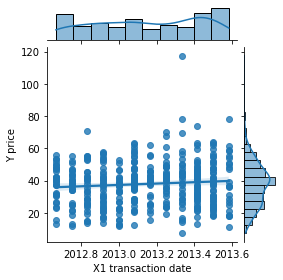

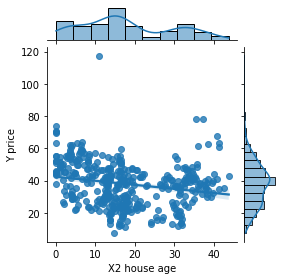

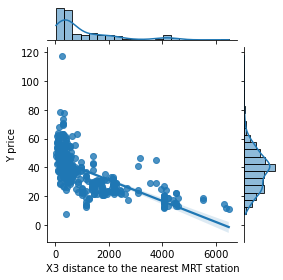

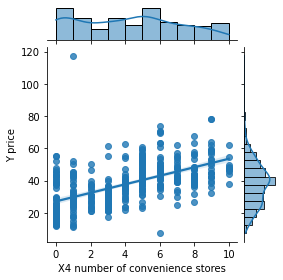

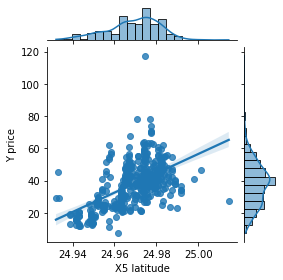

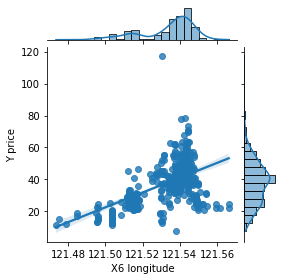

In [39]:
sns.jointplot(x='X1 transaction date',y='Y price',data=spreadsheet,kind='reg',size=4)
sns.jointplot(x='X2 house age',y='Y price',data=spreadsheet,kind='reg',size=4)
sns.jointplot(x='X3 distance to the nearest MRT station',y='Y price',data=spreadsheet,kind='reg',size=4)
sns.jointplot(x='X4 number of convenience stores',y='Y price',data=spreadsheet,kind='reg',size=4)
sns.jointplot(x='X5 latitude',y='Y price',data=spreadsheet,kind='reg',size=4)
sns.jointplot(x='X6 longitude',y='Y price',data=spreadsheet,kind='reg',size=4)

<AxesSubplot:>

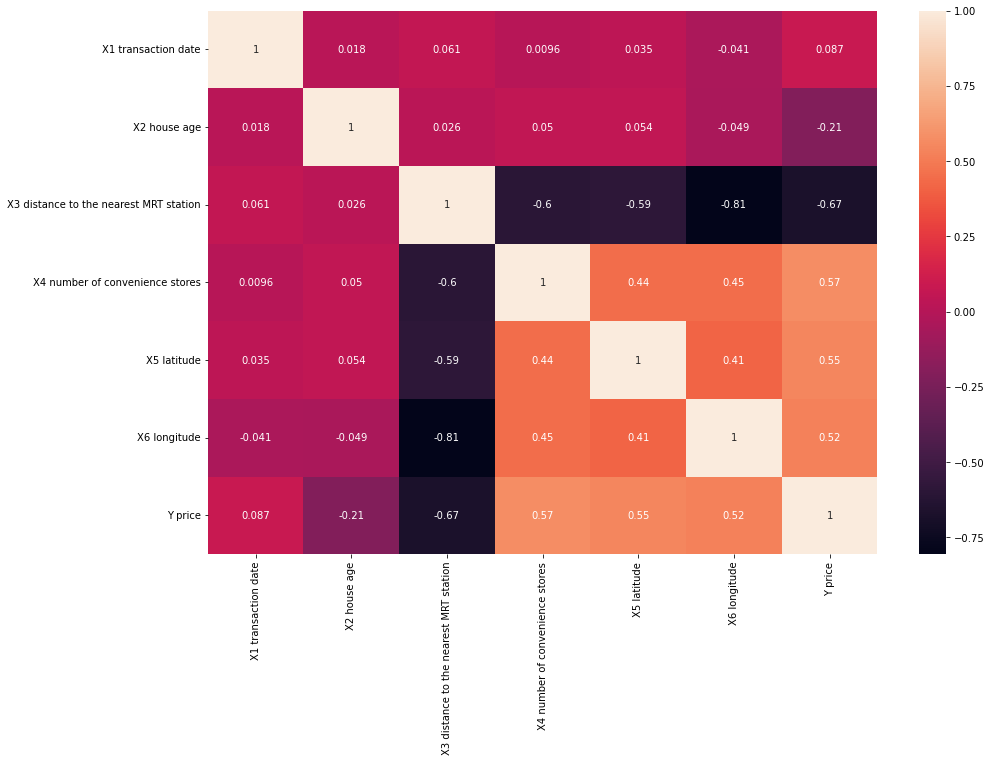

In [40]:
plt.figure(figsize=(15,10))
columns =['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude','Y price']
sns.heatmap(spreadsheet[columns].corr(),annot=True)

In [21]:
# X(Independent variables) and y(target variables) 
X = spreadsheet.iloc[:,1:].values
y = spreadsheet.iloc[:,0].values

In [22]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [23]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [24]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [25]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [26]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  -3
Decision tree  Regression Model Score is  -102
Random Forest Regression Model Score is  -18


,Model,Score,Explained Variance Score
0,Multiple Linear Regression,-0.029294,-81.266522
2,Random forest Regression,-0.177707,-6.261634
1,Decision Tree,-1.017924,-1.045936


In [75]:
#decision tree regression model.
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [47]:
dt=DecisionTreeRegressor(random_state=42,max_depth=4,min_samples_leaf=10)

In [48]:
np.random.seed(0)

In [51]:
df_train,df_test=train_test_split(spreadsheet,train_size=0.7,random_state=100)

In [52]:
df_train.shape,df_test.shape

((289, 8), (125, 8))

In [53]:
df_test.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y price
121,122,2013.500,13.6,492.23130,5,24.96515,121.53737,48.0
353,354,2013.500,4.1,2147.37600,3,24.96299,121.51284,31.3
96,97,2013.417,6.4,90.45606,9,24.97433,121.54310,59.5
43,44,2012.750,34.4,512.78710,6,24.98748,121.54301,34.1
125,126,2013.167,1.1,193.58450,6,24.96571,121.54089,48.6


In [56]:
scaler=MinMaxScaler()

In [57]:
df_train['Y price'] = scaler.fit_transform(df_train[['Y price']])
df_test['Y price'] = scaler.transform(df_test[['Y price']])

In [66]:
y_train=df_train.pop("Y price")
X_train=df_train

y_test=df_test.pop("Y price")
X_test=df_test

In [67]:
X_test.shape,X_train.shape

((125, 7), (289, 7))

In [68]:
#Fit the DT model
dt.fit(X_train,y_train) 

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

In [69]:
pip install pydotplus


  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=f974bc5658b629eabd828a8ec2a9ea505daa518d17bc5e5429d2d73c87e25c5e
  Stored in directory: c:\users\nguta\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [8]:
# Visualizing a Decision Tree using a Classifier (discrete variables, labels, etc.)
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)


# 1
text_representation = tree.export_text(clf)
print(text_representation)

# if you want to save the tree...
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



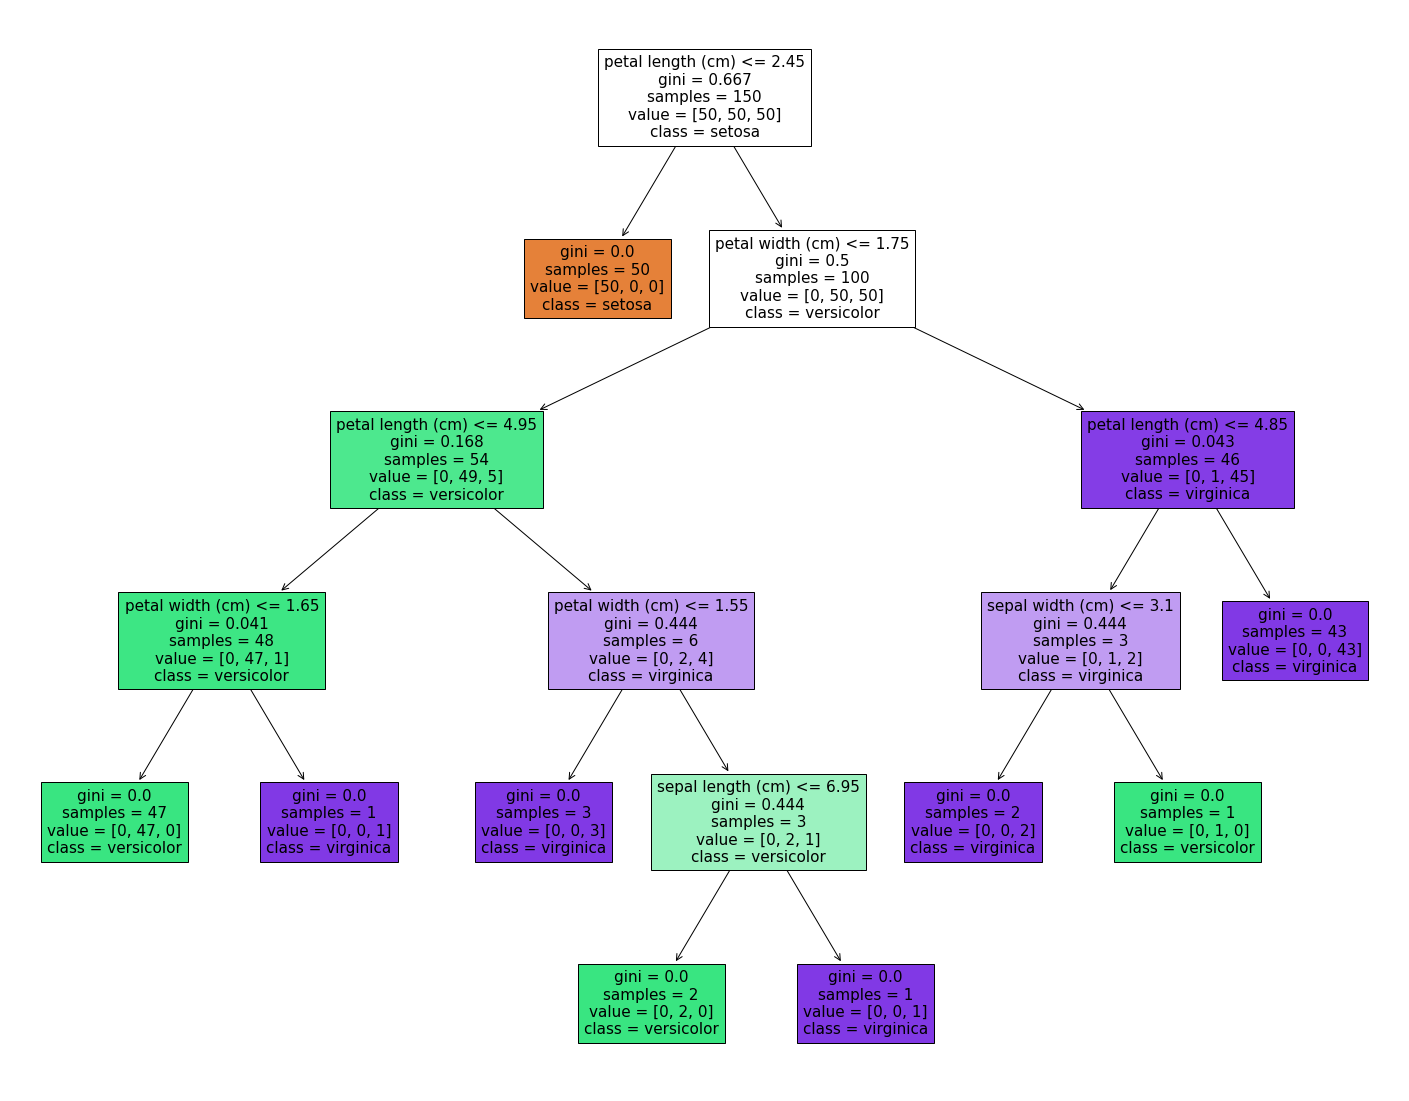

In [72]:
# 2
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [73]:
y_train_pred=dt.predict(X_train)

In [76]:
r2_score(y_train,y_train_pred)

0.7285207533982734

In [77]:
y_test_pred=dt.predict(X_test)

In [78]:
r2_score(y_test, y_test_pred)

0.7522436526317269

In [12]:
#Random Forest Regressor.
from sklearn.ensemble import RandomForestRegressor
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image 
import pydotplus
import numpy as np

In [80]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, min_samples_leaf=10)

In [81]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

In [82]:
sample_tree = rf.estimators_[20]

In [84]:
pip install graphviz 

Note: you may need to restart the kernel to use updated packages.


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
spreadsheet=pd.read_csv('/Users/Nguta/Desktop/Real estate.csv')
X = spreadsheet.iloc[:, 1:2].values
y = spreadsheet.iloc[:, 2].values

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, min_samples_leaf=10)

In [51]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

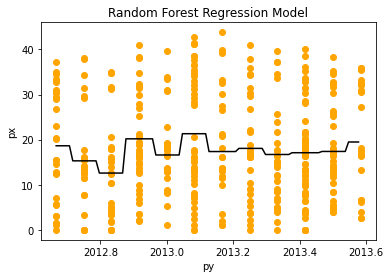

In [62]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'orange')
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Random Forest Regression Model')
plt.xlabel('py')
plt.ylabel('px')
plt.show()

In [65]:
#REPORT
#this is both the decision tree model and the random forest regression models.
#Conclusion
#From the above it is clear that random forest accuracy is 88% and also expalined variance score is 0.84 . 
#So Random Forest is a suitable model for predicting the price of the house.
#Though there remains other regression model which can bring out the best of the dataset.
